In [1]:
import os
from mdcrow import MDCrow

In [2]:
prompt13 = "Simulate 1L6X at pH 5.0 and 8.8, then analyze the SASA and RMSF under both pH conditions."
llm_var = "claude-3-5-sonnet-20240620"
tools = "all"
agent = MDCrow(agent_type="Structured", model=llm_var, top_k_tools=tools, use_memory=False)
print(llm_var)

claude-3-5-sonnet-20240620


Thought: To address this question, we need to follow several steps. First, we'll need to download the PDB file for 1L6X, then set up and run simulations at both pH 5.0 and 8.8. After that, we'll analyze the Solvent Accessible Surface Area (SASA) and Root Mean Square Fluctuation (RMSF) for both conditions. Let's start by downloading the PDB file.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1L6X"
}
```PDB file found with this ID: 1L6X
Thought: Great, we have successfully downloaded the PDB file for 1L6X. Now, we need to set up and run simulations for both pH conditions. Let's start with pH 5.0. We'll use the SetUpandRunFunction tool to set up and run a short simulation. We'll need to adjust the system parameters to reflect the pH.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1L6X_010224",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "system_params": {
      

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

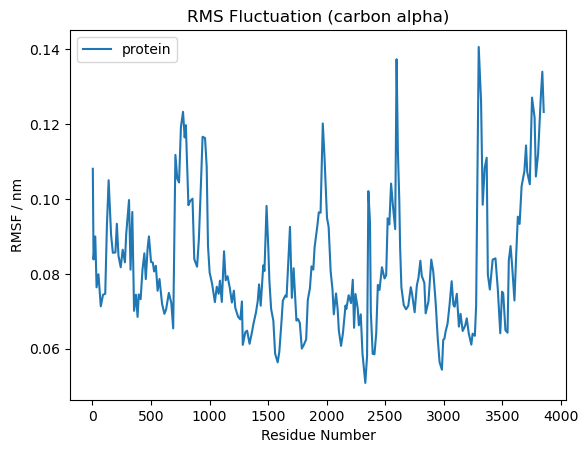

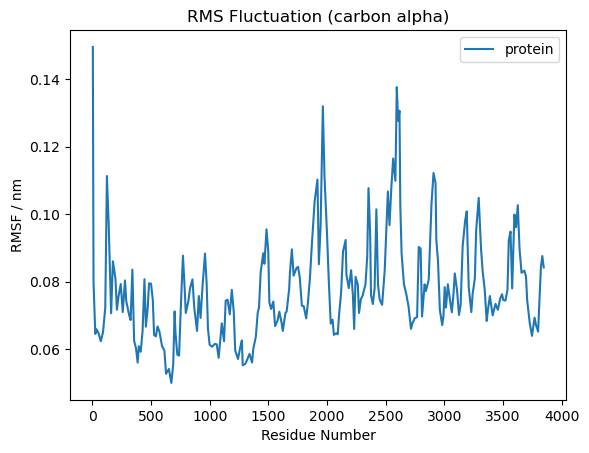

In [3]:
agent.run(prompt13)

In [4]:
registry = agent.path_registry
print(os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_74
Files found in registry: 1L6X_010224: PDB file downloaded from RSCB
 PDBFile ID: 1L6X_010224
 1L6X_010244: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 5.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_010250: Initial positions for simulation sim0_010250
 sim0_010250: Basic Simulation of Protein 1L6X_010244
 rec0_010349: Simulation trajectory for protein 1L6X_010244 and simulation sim0_010250
 rec1_010349: Simulation state log for protein 1L6X_010244 and simulation sim0_010250
 rec2_010349: Simulation pdb frames for protein 1L6X_010244 and simulation sim0_010250
 1L6X_035722: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 8.8. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_035726: Initial positions for simulation sim0_035726
 sim0_035726: Basic Simulation of Protein 1L6X_035722
 rec0_035754: Simulation trajectory for